In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

# GENERATING DATA

In [2]:
#Defining mean & variances to generate data
mean1 = np.array([0 , 1])
mean2 = np.array([5 , 5])

cov1 = np.array([[0 , 1] , [1 , 0]])
cov2 = np.array([[0 , 1] , [1 , 0]])

In [3]:
data1 = np.random.multivariate_normal(mean1 , cov1 , 250)
data2 = np.random.multivariate_normal(mean2 , cov2 , 250)
print data1.shape
print data2.shape

(250, 2)
(250, 2)


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


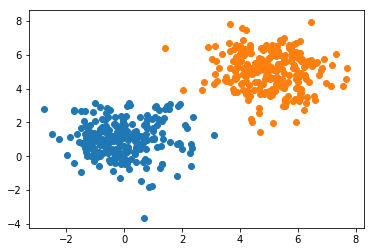

In [4]:
plt.figure(0)
plt.scatter(data1[: , 0] , data1[: , 1])
plt.scatter(data2[: , 0] , data2[: , 1])
plt.show()

# Problem Statement
Given the bunch of clusters and which class/category each point belongs to, can you predict in which class will any given point lie?

# ALGO
'''


1. GET (X,Y) DATA
2. GET TEST POINT x
3. COMPUTE DISTANCE OF x FROM ALL POINTS xi belonging to X i.e D = [d1 ... dn]
4. SORT D
5. TAKE K DISTANCES FROM D [Dk = topk FROM SORTED D]
6. FIND FREQUENCY OF CLASSES[i.e. find which how many points belongs to a particular class]
'''

# We have two datasets and we need only one so we need to concatenate them

In [5]:
datax = np.concatenate((data1 , data2) , axis = 0)#axis 0 mean along rows
print datax.shape

(500, 2)


# Now we also need labels which will tell the class to which the point belongs to as there are 2 classes we'll generate an array of 500 rows and 1 column having half of the rows as 1 label and another halfas another label [Eg: 250 rows 0 and 250 rows 1]

In [6]:
datay = np.zeros((500 , 1))
datay[250 : ] = 1 
#Now first 250 rows has 0 value and last 250 rows has 1

# We'll also concatenate this labels to the data

In [7]:
data = np.concatenate((datax , datay) , axis=1)#axis 1 means along columns
print data.shape

(500, 3)


In [8]:
def knn(train , test , k = 5):
    
    dist = []
    #train contains our data
    #we will iterate over each row of the data
    for i in range(train.shape[0]):
        
        #Getting the point(vector) and label
        ix = train[i , :-1]#all columns except last column
        iy = train[i , -1]#only last column
        
        #compute distance of test point with every point in the train data
        
        d = distance(ix , test)
        
        #we are maintaing a list named distance in which we are appending 
        #distances of test point with every other point
        #iy(label) is been used to know that distance is with which point 
        dist.append([d , iy])
    
    #we are done with distance computation part
    #next step is sorting
    
    sorted_distance = sorted(dist , key=lambda x:x[0])[:k]
    #distance has been sorted according to x[0] of distance list which has distance
    #[:k] means taking first k values of that list or we can say taking the k nearest neighbours
    
    #getting labels
    labels = np.array(sorted_distance)[: , -1]
    
    #checking the frequency of labels 
    freq = np.unique(labels , return_counts = True)
    
    
    #find max frequency and its label
    index = np.argmax(freq[1])
    return freq[0][index]

#Eucledian Distance
#here the distance is being calculated using vectors which is easy and convienent
def distance(v1 , v2):
    return np.sqrt(((v1-v2)**2).sum())
        
        
        
    

In [9]:
x = np.array([6.0 , 6.0])
print knn(data , x )

1.0


In [10]:
x = np.array([2.0 , 2.0])
print knn(data , x )

0.0
